In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
if 0:
    r_3d,m1,m2,mv,x,y,z=np.loadtxt('C:\\Users\Sophia Milanov\Documents\Bachelorarbeit\data\\x-y-z.dat', usecols=(1,9,10,21,30,31,32), unpack=True)
else:
    r_3d,m1,m2,mv,x,y,z=np.loadtxt('/home/milanov/Bachelorarbeit/x-y-z.dat', usecols=(1,9,10,21,30,31,32), unpack=True)

In [4]:
#definition and initialization of values for density profile in bins
r0=0.01
step=30
end=100
stepsize=((np.log10(end)-np.log10(r0))/step)

R=np.zeros(step)
M = np.zeros(step)
rho=np.zeros(step)

r=np.logspace(np.log10(r0),np.log10(end),step+1)
r_i=r[:-1:]
r_a=r[1::]

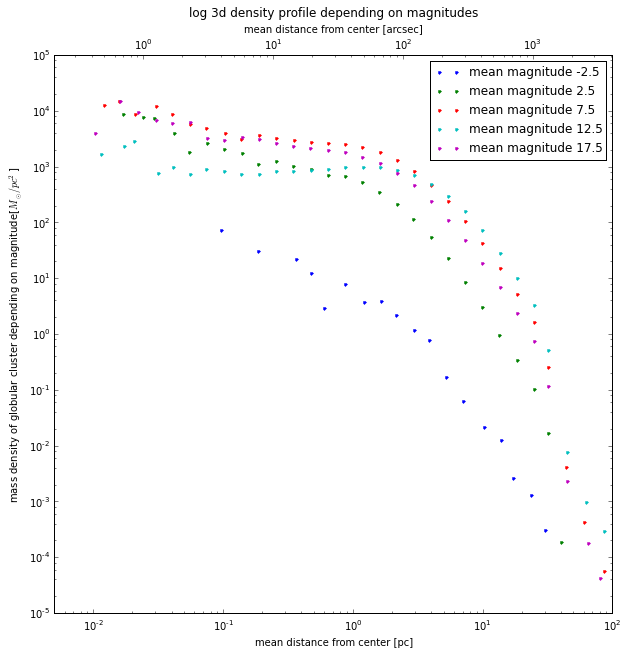

In [43]:
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()

#first loop to split depending on magnitudes
for k in range(-5,20,5):   
    inplot=(k<=mv)*(mv<=k+5)
    for n in range(step): #loop for different bins
        inbin=(r_i[n]<r_3d) * (r_3d<=r_a[n]) #r_3d wird verwendet! creates boolean arrays woth true values if star is in bin distance
        M[n]=np.sum(m1[inbin*inplot])+np.sum(m2[inbin*inplot]) #mass array with both masses of binary system
        rho[n]=M[n]/((r_a[n]**2-r_i[n]**2)*np.pi) #calculates density of bin
        R[n]=np.mean(r_3d[inbin*inplot]) #calculates mean distance of bin
        

    lab='mean magnitude '+str(k+2.5) #label for legend, showing mean magnitude
    ax1.loglog(R,rho,'.',label=lab)
    ax1.legend()
    ax1.set_xlim(0.005,100) 
    ax1.set_xlabel('mean distance from center [pc]')
    ax1.set_ylabel('mass density of globular cluster depending on magnitude[$M_\odot/pc^2$]')

    ax2.set_xlim((0.005/5000)*360*3600/(2*np.pi),(100./5000)*360*3600/(2*np.pi)) #calculates x limits from parsec to arcsec
    ax2.set_xscale('log')
    ax2.set_xlabel('mean distance from center [arcsec]')

    ax2.set_title('log 3d density profile depending on magnitudes',y=1.06) #open question: how to have extra xlabel and title

plt.show()
fig.savefig('Plots/log 3d density profiles for different magnitudes')